### Imports and Configs

In [1]:
# The usual preamble
%matplotlib inline
import folium
from folium import plugins
import pandas as pd
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
# pd.set_option('display.mpl_style', 'default')
plt.style.use('ggplot')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
# This assigns the coffeeshops data to a dataframe object that maps to the "df" variable
df = pd.read_csv("coffeeshops.csv")
df = df.drop_duplicates()

### Let's Work with the Data
It's always best to have an idea of what the dataset is. This dataset was scraped from Foursquare's location data on all coffeeshops within NCR.

In [4]:
# Run df.head() or df.head(n) where n is an integer mapping to the number of lines you want displayed.
# Just running df would display a large summarized version of the DataFrame
df.head(10)

,id,name,lat,lng,checkins,address
0,4b78d398f964a520cee32ee3,Starbucks Coffee,14.734710,121.057599,10428,"Ground Flr, SM City Fairview (Annex 1)"
1,53055beb498e87041e7204f9,Starbucks Coffee,14.735735,121.060213,3793,"Fairview Terraces, Quirino Hwy"
2,4bc1f1a6f8219c74a0f7b310,The Coffee Bean & Tea Leaf,14.736308,121.058135,17441,"G/F Gateway Mall, Gen Roxas Ave"
3,4e5b077352b1b78b81b213b9,Starbucks Coffee,14.734639,121.059474,4116,"2nd Flr, SM City Fairview (Main Bldg)"
4,4ceb3522e888f04d2161516b,Starbucks Coffee,14.553593,121.050662,40149,"Crossroads, Bonifacio Global City"
5,5312cb21498e14478618f0b1,Seattle's Best Coffee,14.737156,121.059300,1228,"Fairview Terraces, Quirino Hwy"
6,4dd26268cc3f7f8c122e7e1e,Starbucks Coffee,14.552860,121.025119,28782,"Ground Flr, 6750 Ayala Tower, 6750 Ayala Ave"
7,4f7b3de0e4b03c16c03f9e29,Starbucks Coffee,14.680479,121.031785,18986,St. Charbel St
8,4b71144cf964a52029392de3,Starbucks Coffee,14.630510,121.034510,28172,212 Tomas Morato Ave
9,52b91335498e393e561ad5b1,Starbucks Coffee,14.574494,121.062474,11133,"Unit R1, Capitol Commons, Shaw Blvd., Pasig City"


### Selecting Columns and Rows
To select a column, we index it with the name of the column and but it in double brackets, like this:

In [5]:
df[["name"]][:10]

,name
0,Starbucks Coffee
1,Starbucks Coffee
2,The Coffee Bean & Tea Leaf
3,Starbucks Coffee
4,Starbucks Coffee
5,Seattle's Best Coffee
6,Starbucks Coffee
7,Starbucks Coffee
8,Starbucks Coffee
9,Starbucks Coffee


If you want to work with more columns, just include them in the list.

In [6]:
df[["name", "lat", "lng"]][:10]

,name,lat,lng
0,Starbucks Coffee,14.734710,121.057599
1,Starbucks Coffee,14.735735,121.060213
2,The Coffee Bean & Tea Leaf,14.736308,121.058135
3,Starbucks Coffee,14.734639,121.059474
4,Starbucks Coffee,14.553593,121.050662
5,Seattle's Best Coffee,14.737156,121.059300
6,Starbucks Coffee,14.552860,121.025119
7,Starbucks Coffee,14.680479,121.031785
8,Starbucks Coffee,14.630510,121.034510
9,Starbucks Coffee,14.574494,121.062474


### Basic Descriptives
Okay we've dealt with the access and manipulation of dataframes. Now we get on with the exciting part of getting actual information from our data.

#### Coffeeshops with the most branches?
Pandas makes this easy to answer with the value_counts() command. It sort of works like a `GROUP BY COUNT` SQL query.

In [7]:
df['name'].value_counts()[:10]

Starbucks Coffee                 151
The Coffee Bean & Tea Leaf        31
Seattle's Best Coffee             15
Bo's Coffee                        7
UCC Vienna Café                    6
J.CO Donuts & Coffee               5
UCC Café Terrace                   5
UCC Park Café                      3
Toby's Estate Coffee Roasters      3
Tully's Coffee                     2
Name: name, dtype: int64

We can plot it out to make more sense of the data using Pandas built-in binding with Matplotlib. 

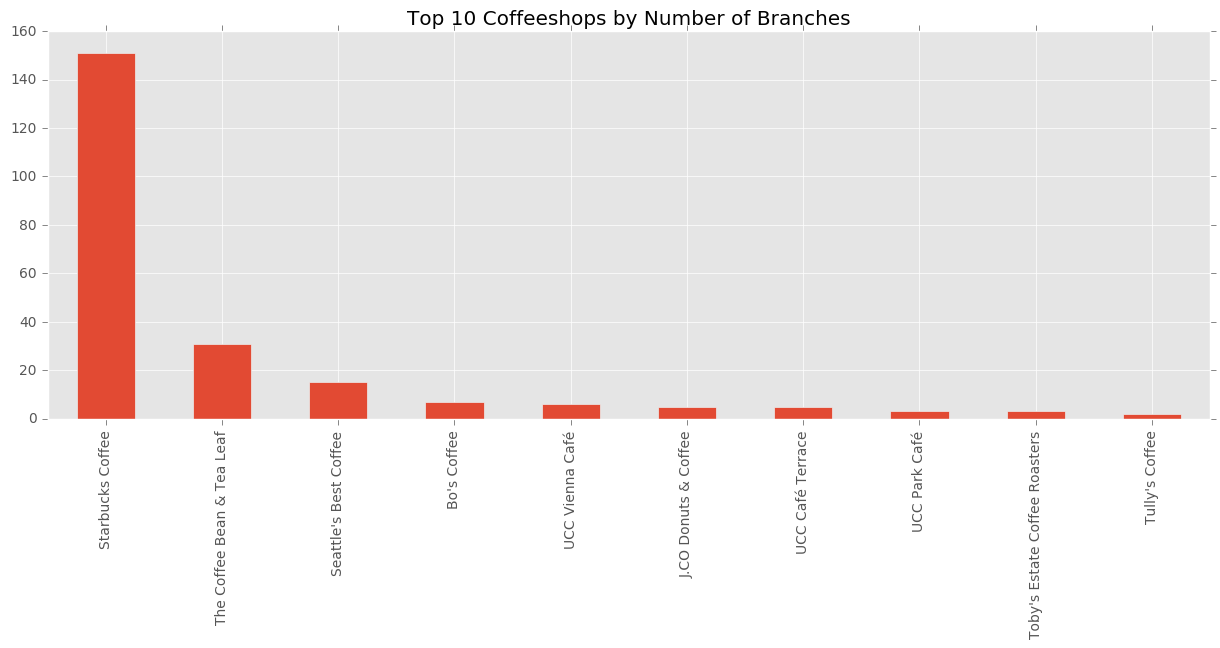

In [8]:
df['name'].value_counts()[:10].plot(kind='bar', title ="Top 10 Coffeeshops by Number of Branches")

#### Average Number of Checkins per Coffee Chain?
Pandas allows us to do this using the groupby function.

In [9]:
df['checkins'].groupby(df['name']).mean().order(ascending=False)[:10]


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


name
Starbucks Coffee              9673.370861
The Chocolate Kiss Café       8493.000000
Cafe-UK Co.                   8372.000000
The Coffee Bean & Tea Leaf    7704.161290
Blenz Coffee                  5711.000000
Café Xocolat                  5201.000000
J.CO Donuts & Coffee          4820.200000
Seattle's Best Coffee         4546.266667
Mrs. Fields Cafe              4299.000000
Baang Coffee                  4284.000000
Name: checkins, dtype: float64

Let's plot it out again.

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


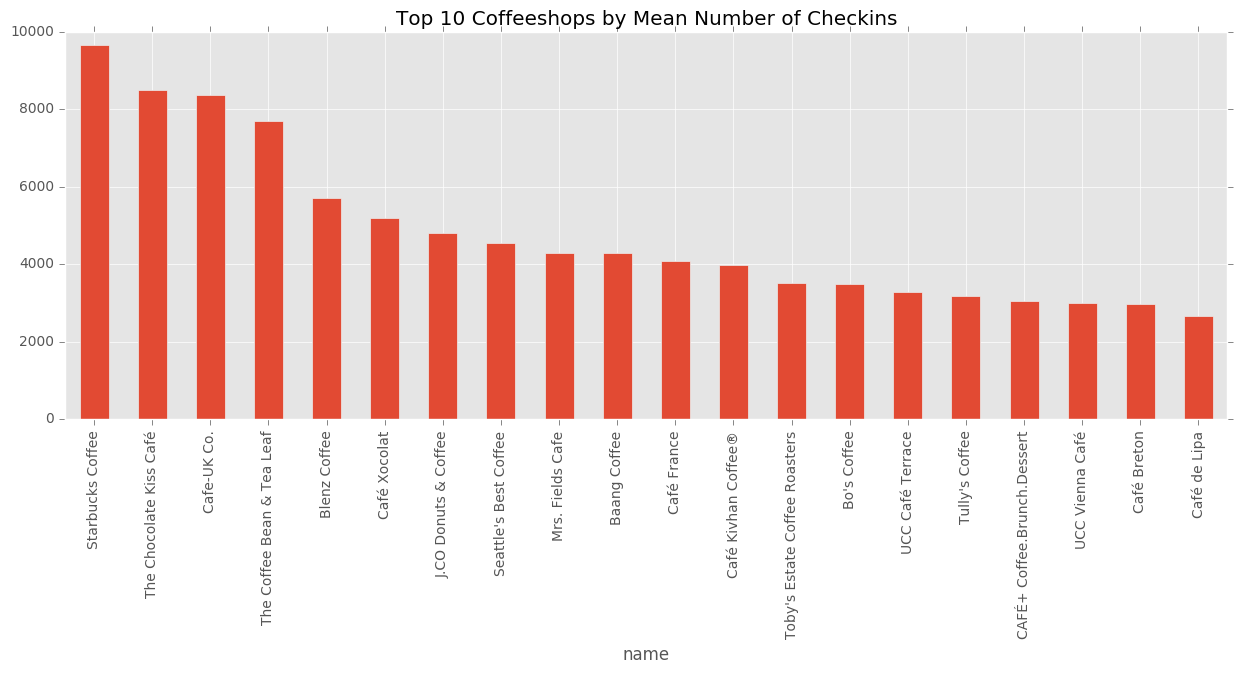

In [11]:
df['checkins'].groupby(df['name']).mean().order(ascending=False)[:20].plot(kind='bar',\
                                                                           title ="Top 10 Coffeeshops by Mean Number of Checkins")

### Plotting the Data
We have coordinate data! Why don't we plot them out? Pandas is able to do this with the help of a mapping library called Folium.
Here's a code snippet that uses the CartoDB Dark Matter basemap.

In [12]:
basemap = folium.Map(location=[14.5562297,121.0204097], height=1000, width=1000, tiles="cartodbdark_matter", zoom_start=15)
for index, row in df.iterrows():
    basemap.circle_marker(location=[row["lat"], row["lng"]], radius=20,
                    popup=row["name"], line_color='#FFDB51', fill_color='#FFDB51')
basemap.save('coffee_shops_dark.html')
basemap

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead


Let's try a heatmap to see where coffeeshops are clustered the most.

In [16]:
map_osm = folium.Map([14.6091, 121.0223], zoom_start=11, tiles='cartodbpositron')
map_osm.add_children(plugins.HeatMap(zip(df["lat"], df["lng"]), radius = 15))
map_osm

An alternative way of visualizing this might be to create a cluster map of the coffeeshop locations.

In [17]:
from folium.plugins import MarkerCluster # for marker clusters

# initialize map
map_osm_cluster = folium.Map([14.6091, 121.0223], zoom_start=13, tiles='cartodbpositron')

# Organize data
latlng = df[['lat', 'lng']]
coordinates = [tuple(x) for x in latlng.values]

# add marker clusters
map_osm_cluster.add_children(MarkerCluster(locations=coordinates, popups=df["name"]))
map_osm_cluster.save('coffee_cluster.html')

map_osm_cluster